In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

pd.set_option('display.precision', 4)
%matplotlib inline

#### Promedios mensuales de Acueducto Mocoa (IDEAM)

In [2]:
df_acmocoa = pd.read_csv('data/DS-ACMocoa-2011-2016-radiacion.csv', sep=';')
df_pr_horario = df_acmocoa.copy()

if 'FechaHora' in df_pr_horario.columns:
  ann = (df_pr_horario['FechaHora'].str.split(' ', n=1, expand=True)[0]).str.split('/', n=2, expand=True)[2]
  dia = df_pr_horario['FechaHora'].str.split('/', n=2, expand=True)[1]
  mes = df_pr_horario['FechaHora'].str.split('/', n=2, expand=True)[0]
  hora = (df_pr_horario['FechaHora'].str.split(' ', n=1, expand=True)[1]).str.split(':', n=1, expand=True)[0]
  if 'mes' not in df_pr_horario.columns and 'hora' not in df_pr_horario.columns:
    df_pr_horario.insert(0, 'ann', ann, True)
    df_pr_horario.insert(1, 'mes', mes, True)
    df_pr_horario.insert(2, 'dia', dia, True)
    df_pr_horario.insert(3, 'hora', hora, True)
    df_pr_horario = df_pr_horario.drop(['FechaHora'], axis=1)

print('Todos los registros: ', df_pr_horario.shape)

# Eliminar registros de los años distintos de 2012, 2013 y 2014
df_pr_horario = df_pr_horario.drop(df_pr_horario[
    (df_pr_horario['ann'] != '2012') &
    (df_pr_horario['ann'] != '2013') &
    (df_pr_horario['ann'] != '2014')].index)

print('Registros con registros de 2012-2014: ', df_pr_horario.shape)

# Eliminar registros con radiacion solar <= 0
df_pr_horario = df_pr_horario.drop(df_pr_horario[df_pr_horario['RadSolar'] <= 0].index)

print('Registros con RadSolar <= 0: ', df_pr_horario.shape)

# Promedio horario de RadSolar
df_pr_horario = df_pr_horario[['mes', 'dia', 'hora', 'RadSolar']]
df_pr_horario = df_pr_horario.groupby(['mes', 'dia', 'hora'], as_index=False).mean()

df_pr_mensual = df_pr_horario.copy()
# df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 0].index)
# print('Registros con RadSolar mensual <= 0: ', df_pr_horario.shape)

# RadSolar diaria en kW/m2
df_pr_mensual = df_pr_mensual[['mes', 'dia', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes', 'dia'], as_index=False).sum()

df_pr_mensual[['mes']] = df_pr_mensual[['mes']].astype(int)
df_pr_mensual[['dia']] = df_pr_mensual[['dia']].astype(int)

# Eliminar registros con dias de menos de 3000 W/m2
df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 3000].index)

df_pr_mensual.sort_values(by=['mes', 'dia'], inplace=True, ignore_index=True)
df_pr_mensual.to_csv('DS-Bosques-de-San-Joaquín-prom_mensuales.csv', sep=';', index=False, encoding='utf-8')

# Promedio mensual de RadSolar
df_pr_mensual = df_pr_mensual[['mes', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes'], as_index=False).mean()

# Convertir RadSolar de w/m2 a kW/m2
df_pr_mensual[['RadSolar']] = df_pr_mensual[['RadSolar']] / 1000

print(df_pr_mensual.shape)
df_pr_mensual.head(12)

Todos los registros:  (41480, 5)
Registros con registros de 2012-2014:  (18263, 5)
Registros con RadSolar <= 0:  (9476, 5)
(31, 2)


,mes,RadSolar
0,1,3.9237
1,2,3.4954
2,3,3.2361
3,4,3.7729
4,5,3.7877
5,6,3.5135
6,7,3.5090
7,8,3.4910
8,9,3.7467
9,10,3.8829


#### Promedios mensuales de El Pepino (IDEAM)

In [3]:
df_elpepino = pd.read_csv('data/DS-El-Penino-2012-2016-radiacion.csv', sep=';')
df_pr_horario = df_elpepino.copy()

if 'FechaHora' in df_pr_horario.columns:
  ann = (df_pr_horario['FechaHora'].str.split(' ', n=1, expand=True)[0]).str.split('/', n=2, expand=True)[2]
  dia = df_pr_horario['FechaHora'].str.split('/', n=2, expand=True)[1]
  mes = df_pr_horario['FechaHora'].str.split('/', n=2, expand=True)[0]
  hora = (df_pr_horario['FechaHora'].str.split(' ', n=1, expand=True)[1]).str.split(':', n=1, expand=True)[0]
  if 'mes' not in df_pr_horario.columns and 'hora' not in df_pr_horario.columns:
    df_pr_horario.insert(0, 'ann', ann, True)
    df_pr_horario.insert(1, 'mes', mes, True)
    df_pr_horario.insert(2, 'dia', dia, True)
    df_pr_horario.insert(3, 'hora', hora, True)
    df_pr_horario = df_pr_horario.drop(['FechaHora'], axis=1)

print('Todos los registros: ', df_pr_horario.shape)

# Eliminar registros de los años distintos de 2012, 2013 y 2014
df_pr_horario = df_pr_horario.drop(df_pr_horario[
    (df_pr_horario['ann'] != '2012') &
    (df_pr_horario['ann'] != '2013') &
    (df_pr_horario['ann'] != '2014')].index)

print('Registros con registros de 2012-2014: ', df_pr_horario.shape)

# Eliminar registros con radiacion solar <= 0
df_pr_horario = df_pr_horario.drop(df_pr_horario[df_pr_horario['RadSolar'] <= 0].index)

print('Registros con RadSolar <= 0: ', df_pr_horario.shape)

# Promedio horario de RadSolar
df_pr_horario = df_pr_horario[['mes', 'dia', 'hora', 'RadSolar']]
df_pr_horario = df_pr_horario.groupby(['mes', 'dia', 'hora'], as_index=False).mean()

df_pr_mensual = df_pr_horario.copy()
# df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 0].index)
# print('Registros con RadSolar mensual <= 0: ', df_pr_horario.shape)

# RadSolar diaria en kW/m2
df_pr_mensual = df_pr_mensual[['mes', 'dia', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes', 'dia'], as_index=False).sum()

df_pr_mensual[['mes']] = df_pr_mensual[['mes']].astype(int)
df_pr_mensual[['dia']] = df_pr_mensual[['dia']].astype(int)

# Eliminar registros con dias de menos de 3000 W/m2
df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 3000].index)

df_pr_mensual.sort_values(by=['mes', 'dia'], inplace=True, ignore_index=True)
df_pr_mensual.to_csv('DS-Bosques-de-San-Joaquín-prom_mensuales.csv', sep=';', index=False, encoding='utf-8')

# Promedio mensual de RadSolar
df_pr_mensual = df_pr_mensual[['mes', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes'], as_index=False).mean()

# Convertir RadSolar de w/m2 a kW/m2
df_pr_mensual[['RadSolar']] = df_pr_mensual[['RadSolar']] / 1000

print(df_pr_mensual.shape)
df_pr_mensual.head(12)

Todos los registros:  (22702, 5)
Registros con registros de 2012-2014:  (9002, 5)
Registros con RadSolar <= 0:  (4975, 5)
(31, 2)


,mes,RadSolar
0,1,3.8290
1,2,4.0190
2,3,4.1357
3,4,3.9079
4,5,3.8190
5,6,4.4320
6,7,3.9421
7,8,3.9525
8,9,3.6778
9,10,4.5074


#### Promedios mensuales de Acueducto Mocoa (NASA)

In [4]:
df_acmocoa_nasa = pd.read_csv('data/DS-Acueduto Mocoa. 2011-2022 (NASA).csv', sep=',')
df_pr_horario = df_acmocoa_nasa.copy()

df_pr_horario.rename(columns = {
    'YEAR':'ann',
    'MO':'mes',
    'DY':'dia',
    'HR':'hora',
    'ALLSKY_SFC_SW_DWN':'RadSolar'}, inplace = True)

print('Todos los registros: ', df_pr_horario.shape)

# Eliminar registros de los años distintos de 2012, 2013 y 2014
df_pr_horario = df_pr_horario.drop(df_pr_horario[
    (df_pr_horario['ann'] != 2012) &
    (df_pr_horario['ann'] != 2013) &
    (df_pr_horario['ann'] != 2014)].index)

df_pr_horario = df_pr_horario[['mes', 'dia', 'hora', 'RadSolar']]

print('Registros con registros de 2012-2014: ', df_pr_horario.shape)

# Eliminar registros con radiacion solar <= 0
df_pr_horario = df_pr_horario.drop(df_pr_horario[df_pr_horario['RadSolar'] <= 0].index)

print('Registros con RadSolar <= 0: ', df_pr_horario.shape)

# Promedio horario de RadSolar
df_pr_horario = df_pr_horario[['mes', 'dia', 'hora', 'RadSolar']]
df_pr_horario = df_pr_horario.groupby(['mes', 'dia', 'hora'], as_index=False).mean()

df_pr_mensual = df_pr_horario.copy()

# RadSolar diaria en kW/m2
df_pr_mensual = df_pr_mensual[['mes', 'dia', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes', 'dia'], as_index=False).sum()

df_pr_mensual[['mes']] = df_pr_mensual[['mes']].astype(int)
df_pr_mensual[['dia']] = df_pr_mensual[['dia']].astype(int)

# Eliminar registros con dias de menos de 3000 W/m2
df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 3000].index)

df_pr_mensual.sort_values(by=['mes', 'dia'], inplace=True, ignore_index=True)
df_pr_mensual.to_csv('DS-Bosques-de-San-Joaquín-prom_mensuales.csv', sep=';', index=False, encoding='utf-8')

# Promedio mensual de RadSolar
df_pr_mensual = df_pr_mensual[['mes', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes'], as_index=False).mean()

# Convertir RadSolar de w/m2 a kW/m2
df_pr_mensual[['RadSolar']] = df_pr_mensual[['RadSolar']] / 1000

print(df_pr_mensual.shape)
df_pr_mensual.head(12)

Todos los registros:  (98568, 10)
Registros con registros de 2012-2014:  (26304, 4)
Registros con RadSolar <= 0:  (13263, 4)
(12, 2)


,mes,RadSolar
0,1,3.9986
1,2,3.7729
2,3,3.6175
3,4,3.8072
4,5,3.6869
5,6,3.5552
6,7,3.4556
7,8,3.7608
8,9,3.9801
9,10,4.1698


#### Promedios mensuales de El Pepino (NASA)

In [5]:
df_elpepino_nasa = pd.read_csv('data/DS-El Pepino. 2011-2022 (NASA).csv', sep=',')
df_pr_horario = df_elpepino_nasa.copy()

df_pr_horario.rename(columns = {
    'YEAR':'ann',
    'MO':'mes',
    'DY':'dia',
    'HR':'hora',
    'ALLSKY_SFC_SW_DWN':'RadSolar'}, inplace = True)

print('Todos los registros: ', df_pr_horario.shape)

# Eliminar registros de los años distintos de 2012, 2013 y 2014
df_pr_horario = df_pr_horario.drop(df_pr_horario[
    (df_pr_horario['ann'] != 2012) &
    (df_pr_horario['ann'] != 2013) &
    (df_pr_horario['ann'] != 2014)].index)

df_pr_horario = df_pr_horario[['mes', 'dia', 'hora', 'RadSolar']]

print('Registros con registros de 2012-2014: ', df_pr_horario.shape)

# Eliminar registros con radiacion solar <= 0
df_pr_horario = df_pr_horario.drop(df_pr_horario[df_pr_horario['RadSolar'] <= 0].index)

print('Registros con RadSolar <= 0: ', df_pr_horario.shape)

# Promedio horario de RadSolar
df_pr_horario = df_pr_horario[['mes', 'dia', 'hora', 'RadSolar']]
df_pr_horario = df_pr_horario.groupby(['mes', 'dia', 'hora'], as_index=False).mean()

df_pr_mensual = df_pr_horario.copy()

# RadSolar diaria en kW/m2
df_pr_mensual = df_pr_mensual[['mes', 'dia', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes', 'dia'], as_index=False).sum()

df_pr_mensual[['mes']] = df_pr_mensual[['mes']].astype(int)
df_pr_mensual[['dia']] = df_pr_mensual[['dia']].astype(int)

# Eliminar registros con dias de menos de 3000 W/m2
df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 3000].index)

df_pr_mensual.sort_values(by=['mes', 'dia'], inplace=True, ignore_index=True)
df_pr_mensual.to_csv('DS-Bosques-de-San-Joaquín-prom_mensuales.csv', sep=';', index=False, encoding='utf-8')

# Promedio mensual de RadSolar
df_pr_mensual = df_pr_mensual[['mes', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes'], as_index=False).mean()

# Convertir RadSolar de w/m2 a kW/m2
df_pr_mensual[['RadSolar']] = df_pr_mensual[['RadSolar']] / 1000

print(df_pr_mensual.shape)
df_pr_mensual.head(12)

Todos los registros:  (98568, 10)
Registros con registros de 2012-2014:  (26304, 4)
Registros con RadSolar <= 0:  (13263, 4)
(12, 2)


,mes,RadSolar
0,1,3.9986
1,2,3.7729
2,3,3.6175
3,4,3.8072
4,5,3.6869
5,6,3.5552
6,7,3.4556
7,8,3.7608
8,9,3.9801
9,10,4.1698


#### Promedios mensuales de San José del Guineo (NASA)

In [6]:
df_el_guineo_nasa = pd.read_csv('data/DS-San José del Guineo. 2011-2020 (NASA).csv', sep=',')
df_pr_horario = df_el_guineo_nasa.copy()

df_pr_horario.rename(columns = {
    'YEAR':'ann',
    'MO':'mes',
    'DY':'dia',
    'HR':'hora',
    'ALLSKY_SFC_SW_DWN':'RadSolar'}, inplace = True)

print('Todos los registros: ', df_pr_horario.shape)

# Eliminar registros de los años distintos de 2012, 2013 y 2014
df_pr_horario = df_pr_horario.drop(df_pr_horario[
    (df_pr_horario['ann'] != 2012) &
    (df_pr_horario['ann'] != 2013) &
    (df_pr_horario['ann'] != 2014)].index)

df_pr_horario = df_pr_horario[['mes', 'dia', 'hora', 'RadSolar']]

print('Registros de 2012-2014: ', df_pr_horario.shape)

# Eliminar registros con radiacion solar <= 0
df_pr_horario = df_pr_horario.drop(df_pr_horario[df_pr_horario['RadSolar'] <= 0].index)

print('Registros con RadSolar <= 0: ', df_pr_horario.shape)

# Promedio horario de RadSolar
df_pr_horario = df_pr_horario[['mes', 'dia', 'hora', 'RadSolar']]
df_pr_horario = df_pr_horario.groupby(['mes', 'dia', 'hora'], as_index=False).mean()

df_pr_mensual = df_pr_horario.copy()

# RadSolar diaria en kW/m2
df_pr_mensual = df_pr_mensual[['mes', 'dia', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes', 'dia'], as_index=False).sum()

df_pr_mensual[['mes']] = df_pr_mensual[['mes']].astype(int)
df_pr_mensual[['dia']] = df_pr_mensual[['dia']].astype(int)

# Eliminar registros con dias de menos de 3000 W/m2
df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 3000].index)

df_pr_mensual.sort_values(by=['mes', 'dia'], inplace=True, ignore_index=True)
df_pr_mensual.to_csv('DS-Bosques-de-San-Joaquín-prom_mensuales.csv', sep=';', index=False, encoding='utf-8')

# Promedio mensual de RadSolar
df_pr_mensual = df_pr_mensual[['mes', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes'], as_index=False).mean()

# Convertir RadSolar de w/m2 a kW/m2
df_pr_mensual[['RadSolar']] = df_pr_mensual[['RadSolar']] / 1000

print(df_pr_mensual.shape)
df_pr_mensual.head(12)

Todos los registros:  (87672, 5)
Registros de 2012-2014:  (26304, 4)
Registros con RadSolar <= 0:  (13285, 4)
(12, 2)


,mes,RadSolar
0,1,4.7002
1,2,4.3334
2,3,4.1027
3,4,4.2103
4,5,4.0324
5,6,3.9582
6,7,3.7920
7,8,4.2374
8,9,4.8182
9,10,4.8247


#### Cargar datos para graficar

In [7]:
df = pd.read_csv('data/Tabla-de-radiación-solar.csv', sep=';')
print(df.dtypes)
df.head(12)

MES/FUENTE     object
RF            float64
NASA          float64
HOMER         float64
IDEAM         float64
RF.1          float64
NASA.1        float64
HOMER.1       float64
IDEAM.1       float64
RF.2          float64
HOMER.2       float64
RF.3          float64
HOMER.3       float64
RF.4          float64
HOMER.4       float64
dtype: object


,MES/FUENTE,RF,NASA,HOMER,IDEAM,RF.1,NASA.1,HOMER.1,IDEAM.1,RF.2,HOMER.2,RF.3,HOMER.3,RF.4,HOMER.4
0,Enero,3.881,3.999,4.38,3.924,4.049,3.999,4.38,3.829,3.997,4.38,3.764,3.94,3.947,3.94
1,Febrero,4.141,3.773,4.33,3.495,3.986,3.773,4.33,4.019,3.597,4.33,3.705,3.68,3.746,3.68
2,Marzo,3.626,3.618,4.30,3.236,3.679,3.618,4.30,4.136,3.847,4.30,3.624,3.50,3.617,3.50
3,Abril,3.784,3.807,4.27,3.773,3.900,3.807,4.27,3.908,3.834,4.27,3.812,3.63,3.697,3.63
4,Mayo,3.528,3.687,4.26,3.788,3.518,3.687,4.26,3.819,3.552,4.26,3.496,3.58,3.467,3.58
5,Junio,3.314,3.555,4.40,3.514,3.372,3.555,4.40,4.432,3.488,4.40,3.642,3.38,3.503,3.38
6,Julio,3.614,3.456,4.38,3.509,3.604,3.456,4.38,3.942,3.445,4.38,3.495,3.40,3.418,3.40
7,Agosto,3.885,3.761,4.45,3.491,4.074,3.761,4.45,3.953,3.910,4.45,3.898,3.63,3.897,3.63
8,Septiembre,4.234,3.980,4.52,3.747,4.261,3.980,4.52,3.678,4.179,4.52,4.357,4.09,4.201,4.09
9,Octubre,4.565,4.170,4.50,3.883,4.622,4.170,4.50,4.507,4.578,4.50,4.623,4.29,4.583,4.29


#### Diagrama de dispersión

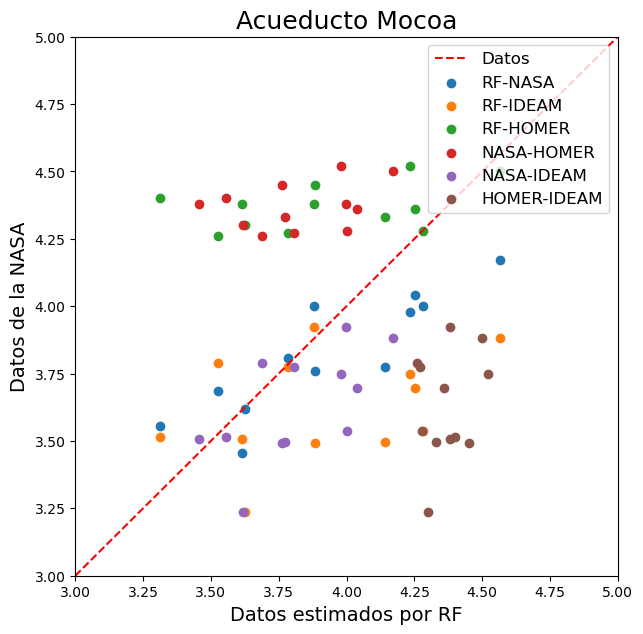

In [8]:
plt.figure(figsize=(7, 7))
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")

plt.scatter(df['RF'], df['NASA'], alpha=1.0)
plt.scatter(df['RF'], df['IDEAM'])
plt.scatter(df['RF'], df['HOMER'])
plt.scatter(df['NASA'], df['HOMER'])
plt.scatter(df['NASA'], df['IDEAM'])
plt.scatter(df['HOMER'], df['IDEAM'])

plt.legend(["Datos", "RF-NASA", "RF-IDEAM", "RF-HOMER", "NASA-HOMER", "NASA-IDEAM", "HOMER-IDEAM"], fontsize="12")
plt.title("Acueducto Mocoa", fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos de la NASA", fontsize=14)

plt.show()

#### Diagrama de área

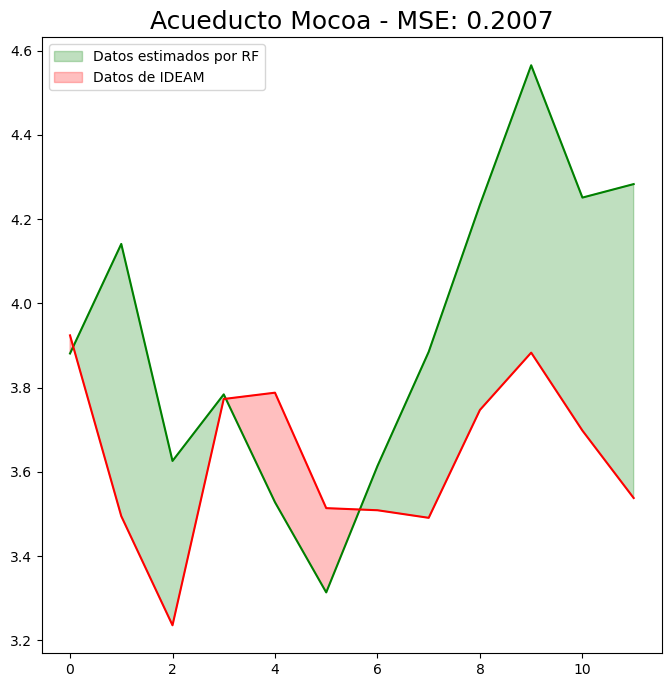

In [9]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

mes = np.arange(12)

# Plot lines
ax.plot(mes, df['RF'], color="green")
ax.plot(mes, df['IDEAM'], color="red")

# Fill area when income > expenses with green
ax.fill_between(
    mes, df['RF'], df['IDEAM'], where=(df['RF'] > df['IDEAM']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Datos estimados por RF"
)

# Fill area when income <= expenses with red
ax.fill_between(
    mes, df['RF'], df['IDEAM'], where=(df['RF'] <= df['IDEAM']), 
    interpolate=True, color="red", alpha=0.25,
    label="Datos de IDEAM"
)
plt.title("Acueducto Mocoa - MSE: "+str(round(mean_squared_error(df['RF'], df['IDEAM']), 4)), fontsize=18)
ax.legend();

#### Mocoa

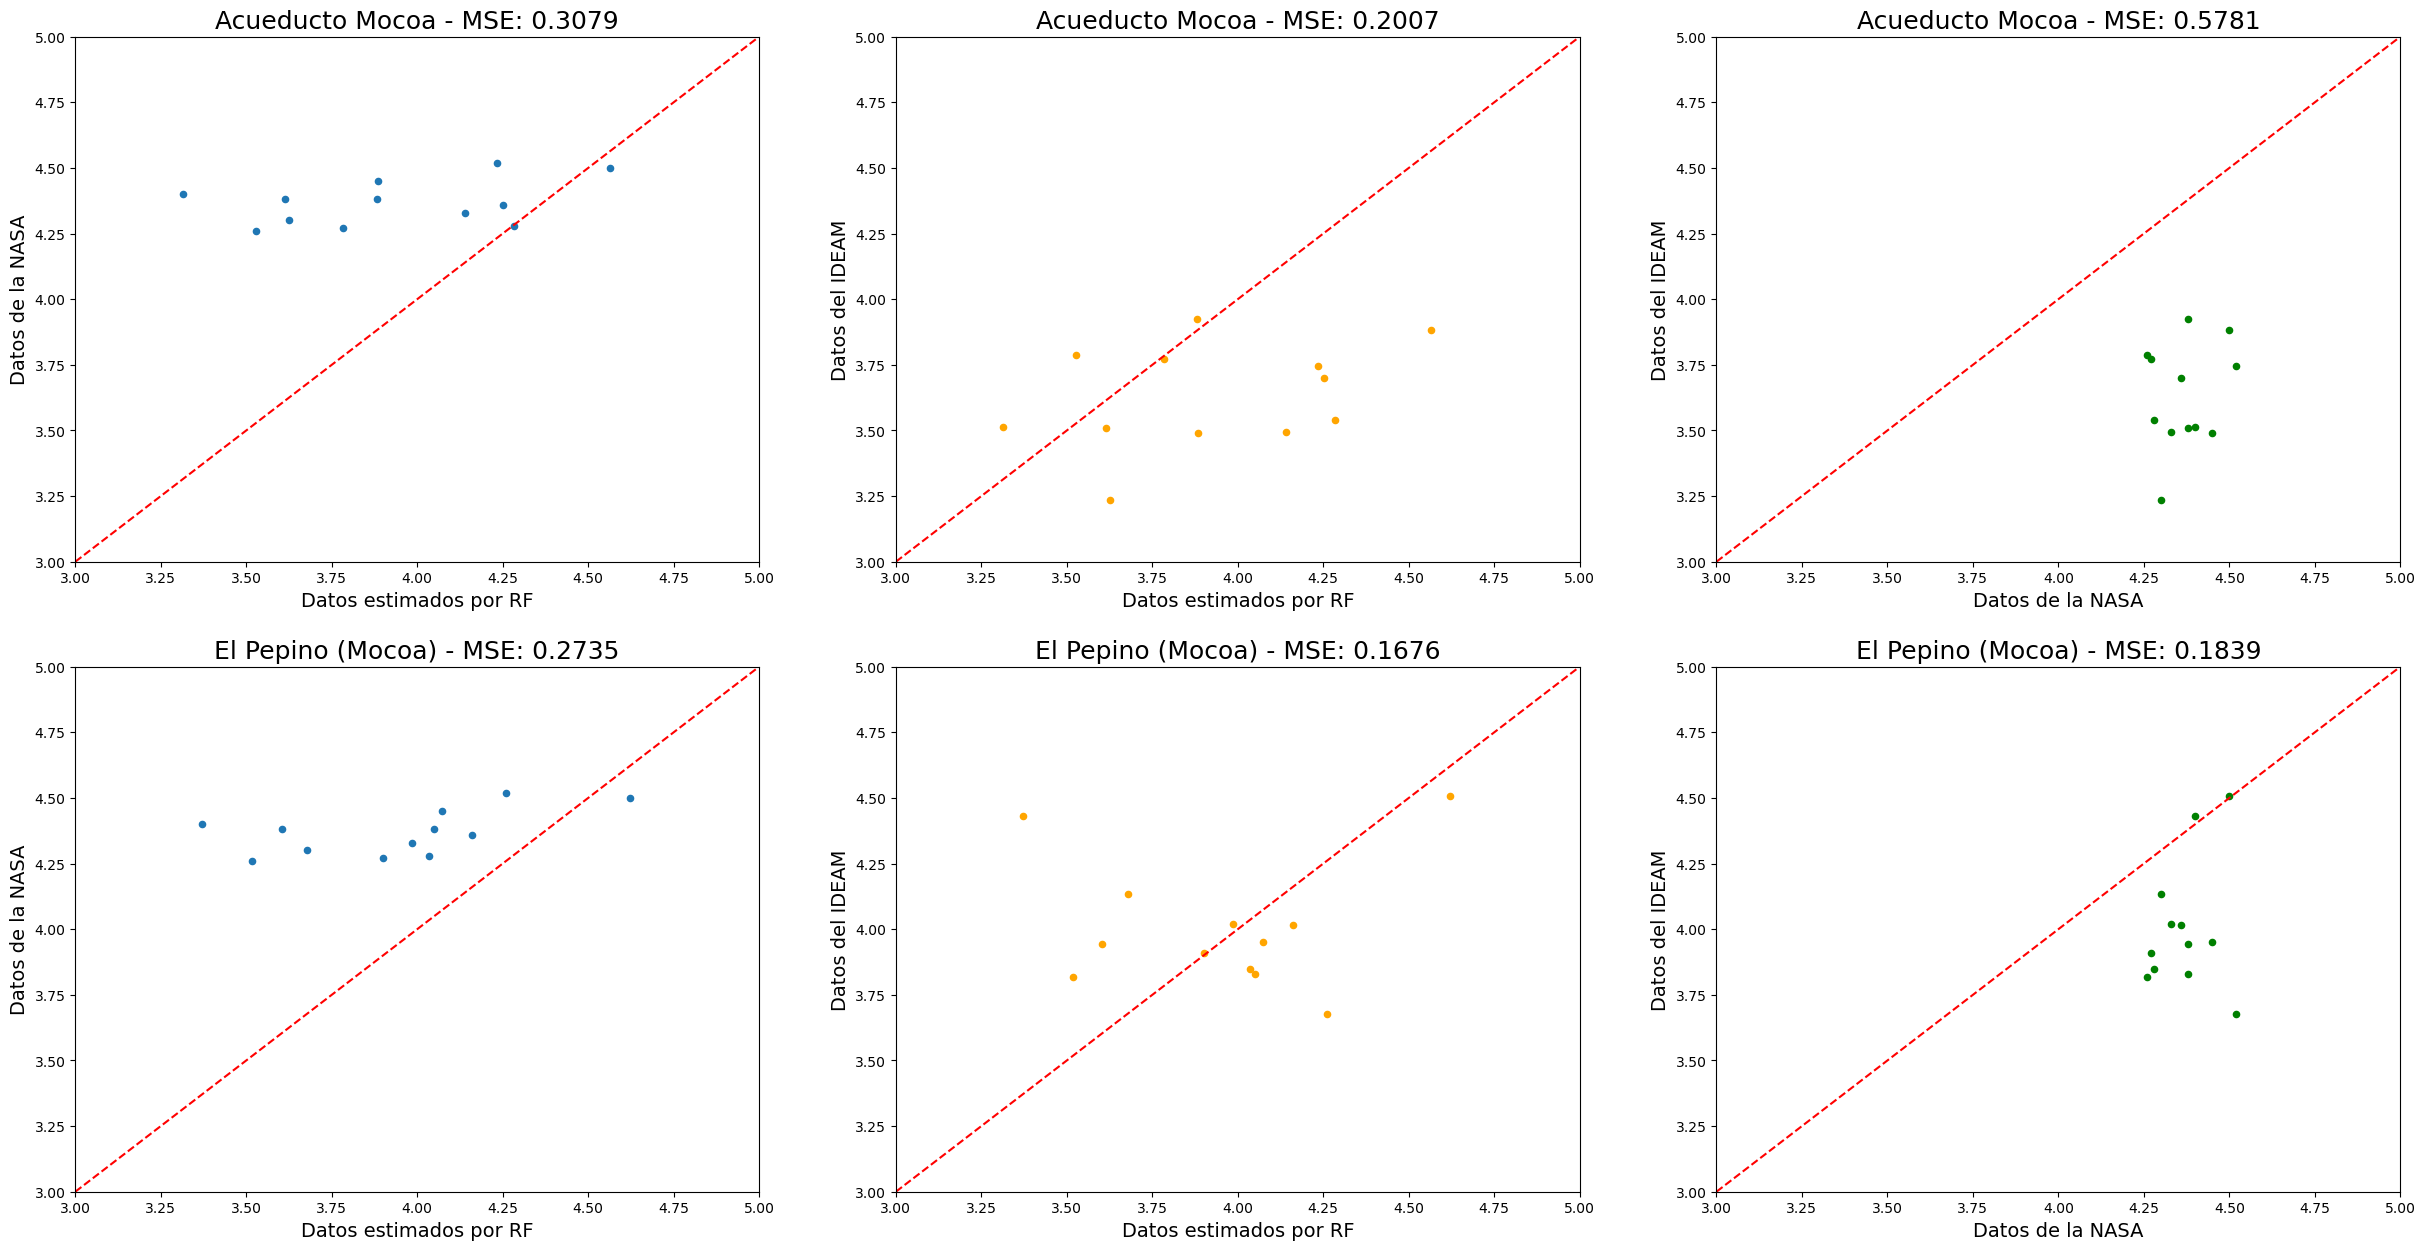

In [10]:
fig = plt.figure(figsize=(30, 15))

ax = fig.add_subplot(2,3,1)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='RF', y='HOMER', kind='scatter', ax=ax)
plt.title("Acueducto Mocoa - MSE: "+str(round(mean_squared_error(df['RF'], df['HOMER']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos de la NASA", fontsize=14)

ax = fig.add_subplot(2,3,2)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='RF', y='IDEAM', kind='scatter', ax=ax, color='orange')
plt.title("Acueducto Mocoa - MSE: "+str(round(mean_squared_error(df['RF'], df['IDEAM']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos del IDEAM", fontsize=14)

ax = fig.add_subplot(2,3,3)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='HOMER', y='IDEAM', kind='scatter', ax=ax, color='green')
plt.title("Acueducto Mocoa - MSE: "+str(round(mean_squared_error(df['HOMER'], df['IDEAM']), 4)), fontsize=18)
plt.xlabel("Datos de la NASA", fontsize=14)
plt.ylabel("Datos del IDEAM", fontsize=14)

ax = fig.add_subplot(2,3,4)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='RF.1', y='HOMER.1', kind='scatter', ax=ax)
plt.title("El Pepino (Mocoa) - MSE: "+str(round(mean_squared_error(df['RF.1'], df['HOMER.1']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos de la NASA", fontsize=14)

ax = fig.add_subplot(2,3,5)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='RF.1', y='IDEAM.1', kind='scatter', ax=ax, color='orange')
plt.title("El Pepino (Mocoa) - MSE: "+str(round(mean_squared_error(df['RF.1'], df['IDEAM.1']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos del IDEAM", fontsize=14)

ax = fig.add_subplot(2,3,6)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='HOMER.1', y='IDEAM.1', kind='scatter', ax=ax, color='green')
plt.title("El Pepino (Mocoa) - MSE: "+str(round(mean_squared_error(df['HOMER.1'], df['IDEAM.1']), 4)), fontsize=18)
plt.xlabel("Datos de la NASA", fontsize=14)
plt.ylabel("Datos del IDEAM", fontsize=14)

plt.show()

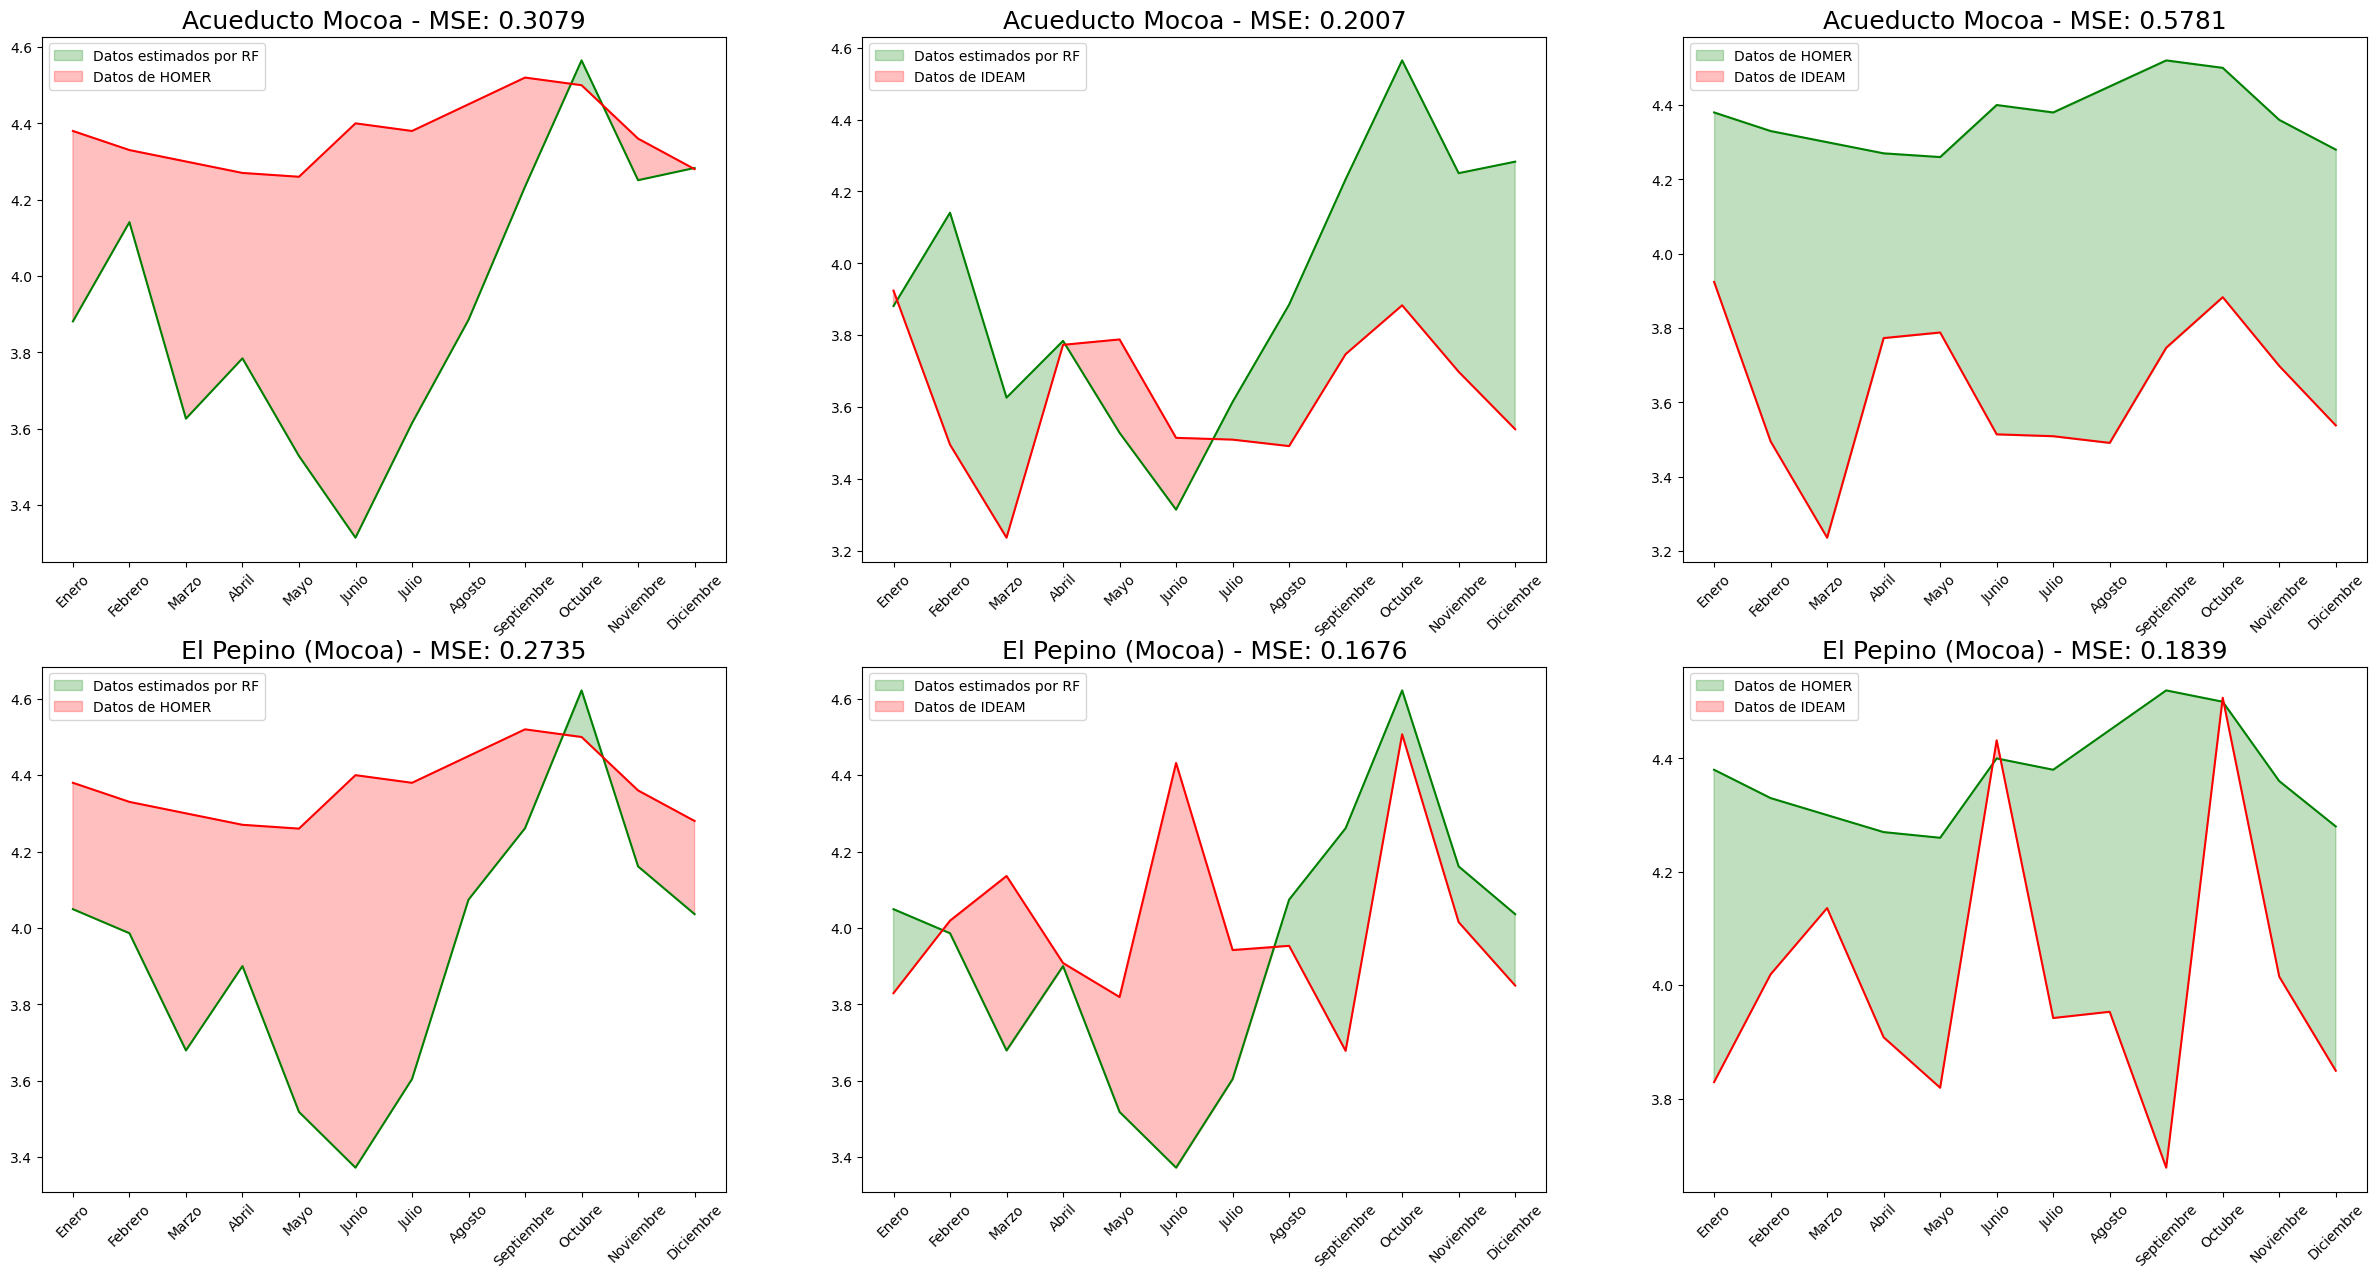

In [11]:
fig = plt.figure(figsize=(30, 15))

mes = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
ax = fig.add_subplot(2,3,1)

# Plot lines
ax.plot(mes, df['RF'], color="green")
ax.plot(mes, df['HOMER'], color="red")

# Fill area when income > expenses with green
ax.fill_between(
    mes, df['RF'], df['HOMER'], where=(df['RF'] > df['HOMER']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Datos estimados por RF"
)

# Fill area when income <= expenses with red
ax.fill_between(
    mes, df['RF'], df['HOMER'], where=(df['RF'] <= df['HOMER']), 
    interpolate=True, color="red", alpha=0.25,
    label="Datos de HOMER"
)
plt.title("Acueducto Mocoa - MSE: "+str(round(mean_squared_error(df['RF'], df['HOMER']), 4)), fontsize=18)
plt.xticks(rotation=45)
ax.legend();

ax = fig.add_subplot(2,3,2)
ax.plot(mes, df['RF'], color="green")
ax.plot(mes, df['IDEAM'], color="red")

ax.fill_between(
    mes, df['RF'], df['IDEAM'], where=(df['RF'] > df['IDEAM']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Datos estimados por RF"
)
ax.fill_between(
    mes, df['RF'], df['IDEAM'], where=(df['RF'] <= df['IDEAM']), 
    interpolate=True, color="red", alpha=0.25,
    label="Datos de IDEAM"
)
plt.title("Acueducto Mocoa - MSE: "+str(round(mean_squared_error(df['RF'], df['IDEAM']), 4)), fontsize=18)
plt.xticks(rotation=45)
ax.legend();

ax = fig.add_subplot(2,3,3)
ax.plot(mes, df['HOMER'], color="green")
ax.plot(mes, df['IDEAM'], color="red")

ax.fill_between(
    mes, df['HOMER'], df['IDEAM'], where=(df['HOMER'] > df['IDEAM']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Datos de HOMER"
)
ax.fill_between(
    mes, df['HOMER'], df['IDEAM'], where=(df['HOMER'] <= df['IDEAM']), 
    interpolate=True, color="red", alpha=0.25,
    label="Datos de IDEAM"
)
plt.title("Acueducto Mocoa - MSE: "+str(round(mean_squared_error(df['HOMER'], df['IDEAM']), 4)), fontsize=18)
plt.xticks(rotation=45)
ax.legend();

ax = fig.add_subplot(2,3,4)
ax.plot(mes, df['RF.1'], color="green")
ax.plot(mes, df['HOMER.1'], color="red")

ax.fill_between(
    mes, df['RF.1'], df['HOMER.1'], where=(df['RF.1'] > df['HOMER.1']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Datos estimados por RF"
)

ax.fill_between(
    mes, df['RF.1'], df['HOMER.1'], where=(df['RF.1'] <= df['HOMER.1']), 
    interpolate=True, color="red", alpha=0.25,
    label="Datos de HOMER"
)
plt.title("El Pepino (Mocoa) - MSE: "+str(round(mean_squared_error(df['RF.1'], df['HOMER.1']), 4)), fontsize=18)
plt.xticks(rotation=45)
ax.legend();

ax = fig.add_subplot(2,3,5)
ax.plot(mes, df['RF.1'], color="green")
ax.plot(mes, df['IDEAM.1'], color="red")

ax.fill_between(
    mes, df['RF.1'], df['IDEAM.1'], where=(df['RF.1'] > df['IDEAM.1']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Datos estimados por RF"
)
ax.fill_between(
    mes, df['RF.1'], df['IDEAM.1'], where=(df['RF.1'] <= df['IDEAM.1']), 
    interpolate=True, color="red", alpha=0.25,
    label="Datos de IDEAM"
)
plt.title("El Pepino (Mocoa) - MSE: "+str(round(mean_squared_error(df['RF.1'], df['IDEAM.1']), 4)), fontsize=18)
plt.xticks(rotation=45)
ax.legend();

ax = fig.add_subplot(2,3,6)
ax.plot(mes, df['HOMER.1'], color="green")
ax.plot(mes, df['IDEAM.1'], color="red")

ax.fill_between(
    mes, df['HOMER.1'], df['IDEAM.1'], where=(df['HOMER.1'] > df['IDEAM.1']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Datos de HOMER"
)
ax.fill_between(
    mes, df['HOMER.1'], df['IDEAM.1'], where=(df['HOMER.1'] <= df['IDEAM.1']), 
    interpolate=True, color="red", alpha=0.25,
    label="Datos de IDEAM"
)
plt.title("El Pepino (Mocoa) - MSE: "+str(round(mean_squared_error(df['HOMER.1'], df['IDEAM.1']), 4)), fontsize=18)
plt.xticks(rotation=45)
ax.legend();

plt.show()

#### Villagarzón, Puerto Caicedo, Puerto Asís

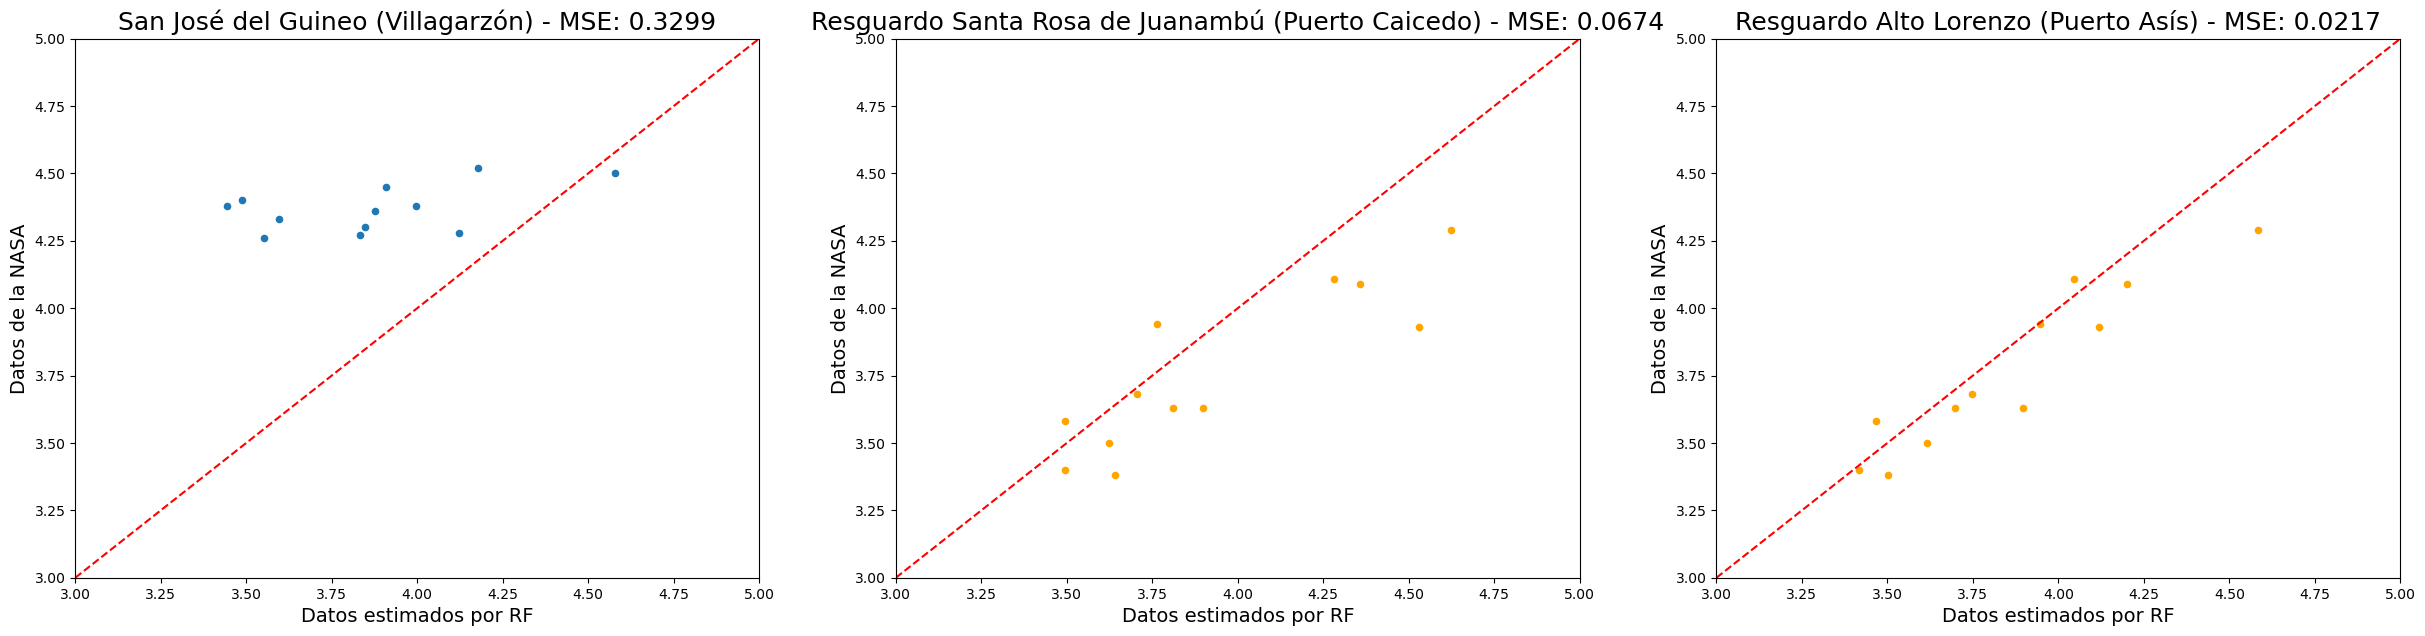

In [12]:
fig = plt.figure(figsize=(30, 7))

ax = fig.add_subplot(1,3,1)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='RF.2', y='HOMER.2', kind='scatter', ax=ax)
plt.title("San José del Guineo (Villagarzón) - MSE: "+str(round(mean_squared_error(df['RF.2'], df['HOMER.2']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos de la NASA", fontsize=14)

ax = fig.add_subplot(1,3,2)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='RF.3', y='HOMER.3', kind='scatter', ax=ax, color='orange')
plt.title("Resguardo Santa Rosa de Juanambú (Puerto Caicedo) - MSE: "+str(round(mean_squared_error(df['RF.3'], df['HOMER.3']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos de la NASA", fontsize=14)

ax = fig.add_subplot(1,3,3)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='RF.4', y='HOMER.4', kind='scatter', ax=ax, color='orange')
plt.title("Resguardo Alto Lorenzo (Puerto Asís) - MSE: "+str(round(mean_squared_error(df['RF.4'], df['HOMER.4']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos de la NASA", fontsize=14)

plt.show()

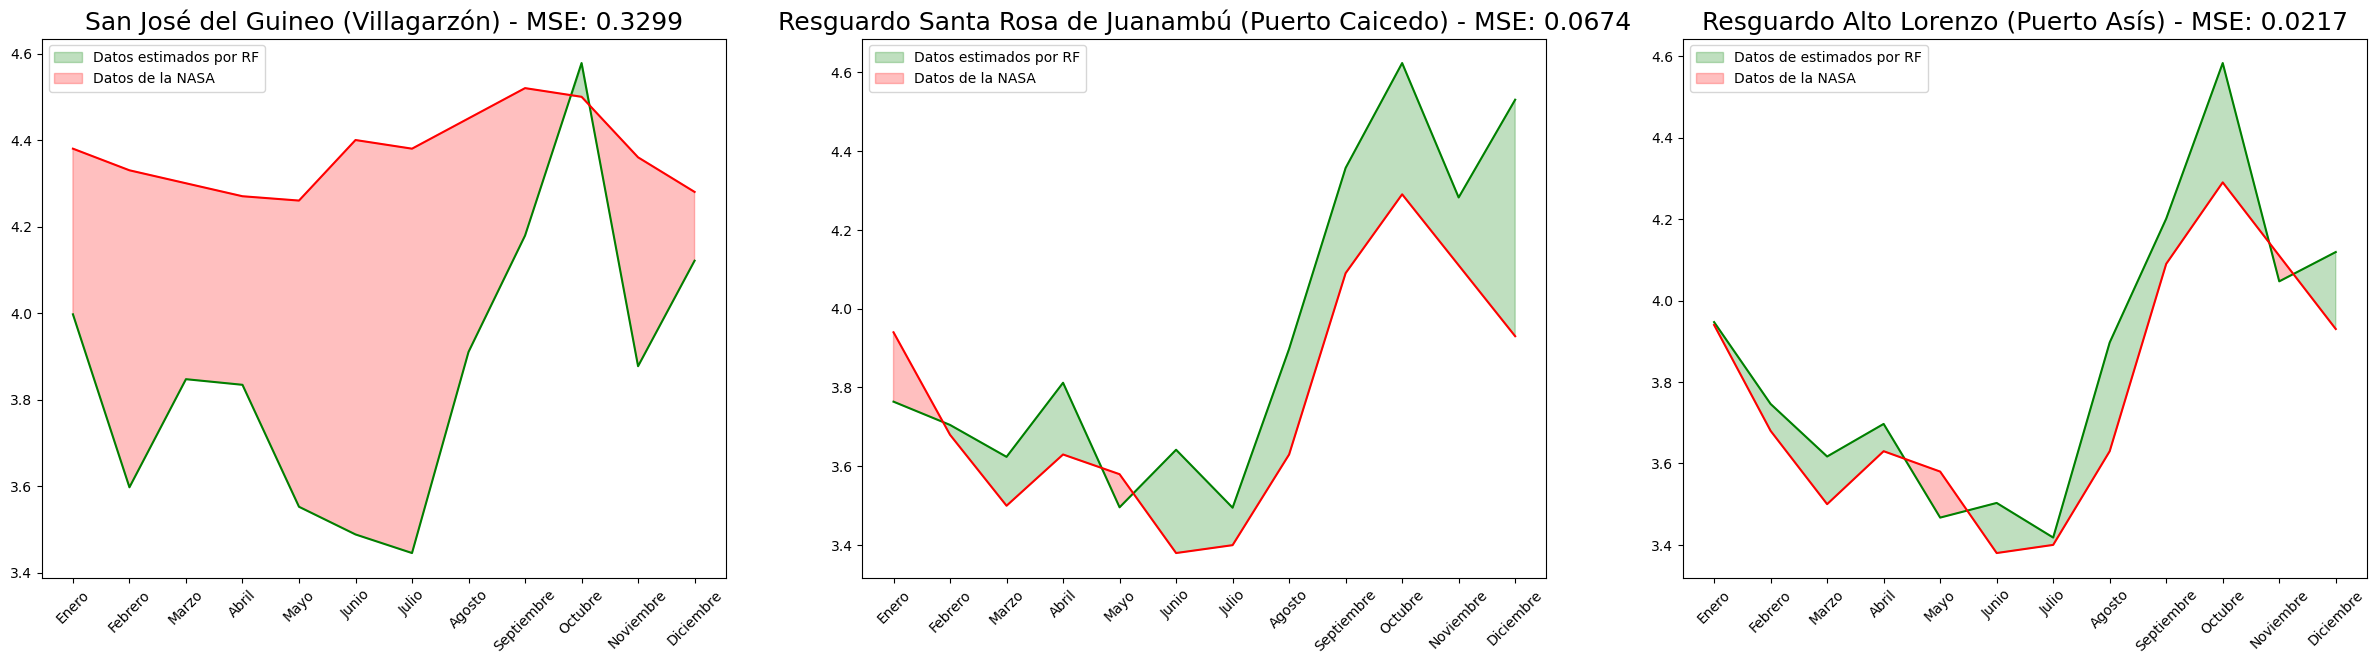

In [13]:
fig = plt.figure(figsize=(30, 7))

mes = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
ax = fig.add_subplot(1,3,1)

# Plot lines
ax.plot(mes, df['RF.2'], color="green")
ax.plot(mes, df['HOMER.2'], color="red")

# Fill area when income > expenses with green
ax.fill_between(
    mes, df['RF.2'], df['HOMER.2'], where=(df['RF.2'] > df['HOMER.2']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Datos estimados por RF"
)

# Fill area when income <= expenses with red
ax.fill_between(
    mes, df['RF.2'], df['HOMER.2'], where=(df['RF.2'] <= df['HOMER.2']), 
    interpolate=True, color="red", alpha=0.25,
    label="Datos de la NASA"
)
plt.title("San José del Guineo (Villagarzón) - MSE: "+str(round(mean_squared_error(df['RF.2'], df['HOMER.2']), 4)), fontsize=18)
plt.xticks(rotation=45)
ax.legend();

ax = fig.add_subplot(1,3,2)
ax.plot(mes, df['RF.3'], color="green")
ax.plot(mes, df['HOMER.3'], color="red")

ax.fill_between(
    mes, df['RF.3'], df['HOMER.3'], where=(df['RF.3'] > df['HOMER.3']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Datos estimados por RF"
)
ax.fill_between(
    mes, df['RF.3'], df['HOMER.3'], where=(df['RF.3'] <= df['HOMER.3']), 
    interpolate=True, color="red", alpha=0.25,
    label="Datos de la NASA"
)
plt.title("Resguardo Santa Rosa de Juanambú (Puerto Caicedo) - MSE: "+str(round(mean_squared_error(df['RF.3'], df['HOMER.3']), 4)), fontsize=18)
plt.xticks(rotation=45)
ax.legend();

ax = fig.add_subplot(1,3,3)
ax.plot(mes, df['RF.4'], color="green")
ax.plot(mes, df['HOMER.4'], color="red")

ax.fill_between(
    mes, df['RF.4'], df['HOMER.4'], where=(df['RF.4'] > df['HOMER.4']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Datos de estimados por RF"
)
ax.fill_between(
    mes, df['RF.4'], df['HOMER.4'], where=(df['RF.4'] <= df['HOMER.4']), 
    interpolate=True, color="red", alpha=0.25,
    label="Datos de la NASA"
)
plt.title("Resguardo Alto Lorenzo (Puerto Asís) - MSE: "+str(round(mean_squared_error(df['RF.4'], df['HOMER.4']), 4)), fontsize=18)
plt.xticks(rotation=45)
ax.legend();

plt.show()